<a href="https://colab.research.google.com/github/prithvi181998/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
% load_ext autotime

time: 2.42 ms (started: 2021-05-24 06:19:00 +00:00)


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
Images = []
flat_data = []

datadir = '/content/drive/MyDrive/Python-April/Machine Learning/Images'

categories = ['Naruto','Midoriya','Eren'] # Name the folder with these categories

for category in categories:
     class_num = categories.index(category)
     path = os.path.join(datadir,category)
     for img in os.listdir(path):
       img_array = imread(os.path.join(path,img))
       #print(img_array.shape)
#      # plt.imshow(img_array)
       img_resized = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
       flat_data.append(img_resized.flatten())
       Images.append(img_resized)
       target.append(class_num)
     
flat_data = np.array(flat_data)
target = np.array(target)
Images = np.array(Images)

time: 17.7 s (started: 2021-05-24 06:19:07 +00:00)


In [3]:
flat_data[0]

array([0.38419608, 0.51372549, 0.39607843, ..., 0.36588235, 0.53796078,
       0.39678431])

time: 7.5 ms (started: 2021-05-24 06:19:29 +00:00)


In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

time: 4.4 ms (started: 2021-05-24 06:19:34 +00:00)


<BarContainer object of 3 artists>

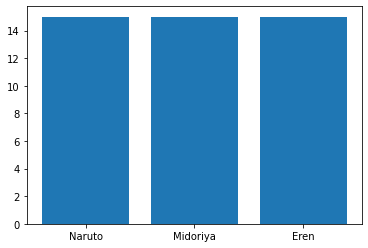

time: 173 ms (started: 2021-05-24 06:19:38 +00:00)


In [5]:
unique,count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [6]:
#Spiltting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state=109)

time: 178 ms (started: 2021-05-24 06:19:45 +00:00)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C' : [1,10,100,1000],'kernel' : ['linear']},
             {'C' : [1,10,100,1000],'gamma': [0.001,0.0001],'kernel': ['rbf']},
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 31.1 s (started: 2021-05-24 06:19:49 +00:00)


In [8]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0])

time: 60.3 ms (started: 2021-05-24 06:20:26 +00:00)


In [9]:
y_test

array([2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1])

time: 6.28 ms (started: 2021-05-24 06:20:29 +00:00)


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 930 µs (started: 2021-05-24 06:20:33 +00:00)


In [11]:
accuracy_score(y_pred,y_test)

0.5

time: 7.68 ms (started: 2021-05-24 06:20:35 +00:00)


In [12]:
confusion_matrix(y_pred,y_test)

array([[1, 2, 1],
       [1, 3, 3],
       [0, 0, 3]])

time: 5.47 ms (started: 2021-05-24 06:20:38 +00:00)


In [13]:
#Saving the model usimg pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 27.5 ms (started: 2021-05-24 06:20:42 +00:00)


In [14]:
model = pickle.load(open('img_model.p','rb'))

time: 23.7 ms (started: 2021-05-24 06:20:45 +00:00)


/content/drive/MyDrive/Python-April/Machine Learning/naruto test 3.jfif
(169, 298, 3)
PREDICTED OUTPUT : Naruto


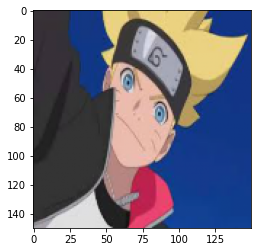

time: 22.8 s (started: 2021-05-24 06:20:48 +00:00)


In [15]:
#testing a new image
flat_data = []
url = input()
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')

In [1]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

In [4]:
#deployment
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('depreciation.showfileUploaderEncodiung', False)
st.title('Image Classifier Using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))
uyploaded_file = st.file_uploader("Choose an image...",type = "jpg")
if uploaded file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    categories = ['Naruto','Midoriya','Eren']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(categories):
      st.write(f'{item} : {q[0][index]*100}')

Overwriting app.py


In [3]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://1a738179a641.ngrok.io" -> "http://localhost:80">